In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [8]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [10]:
df2 = df[['age', 'job', 'salary', 'marital', 'education', 'default','housing', 'loan','response']]

In [11]:
df2.head()

,age,job,salary,marital,education,default,housing,loan,response
0,58,management,100000,married,tertiary,no,yes,no,no
1,44,technician,60000,single,secondary,no,yes,no,no
2,33,entrepreneur,120000,married,secondary,no,yes,yes,no
3,47,blue-collar,20000,married,unknown,no,yes,no,no
4,33,unknown,0,single,unknown,no,no,no,no


In [12]:
print(df.job.unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [13]:
print(df.marital.unique())

['married' 'single' 'divorced']


In [14]:
print(df.education.unique())

['tertiary' 'secondary' 'unknown' 'primary']


In [15]:
df3 = df2

In [16]:
df3.response= df3.response.map(dict(yes=1, no=0))

/home/munnazeera/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df3.default= df3.default.map(dict(yes=1, no=0))
df3.housing= df3.housing.map(dict(yes=1, no=0))
df3.loan= df3.loan.map(dict(yes=1, no=0))

In [18]:
df3.education = df3.education.map(dict(primary=1, secondary=2, tertiary=3, unknown=0))

In [19]:
df3.marital = df3.marital.map(dict(single = 0, married = 1, divorced = 2))

In [20]:
li = ['unknown','student','blue-collar','entrepreneur','management','technician','housemaid',
      'unemployed','self-employed','admin.','services','retired']
df3.job =pd.Series(np.searchsorted(li, df3.job.values), df3.index)

In [21]:
df3.head()

,age,job,salary,marital,education,default,housing,loan,response
0,58,10,100000,1,3,0,1,0,0
1,44,12,60000,0,2,0,1,0,0
2,33,0,120000,1,2,0,1,1,0
3,47,0,20000,1,0,0,1,0,0
4,33,12,0,0,0,0,0,0,0


In [22]:
df3.marital.unique

<bound method Series.unique of 0        1
1        0
2        1
3        1
4        0
        ..
45206    1
45207    2
45208    1
45209    1
45210    1
Name: marital, Length: 45211, dtype: int64>

In [23]:
df3.iloc[:,-1].value_counts()/len(df3)

0    0.883015
1    0.116985
Name: response, dtype: float64

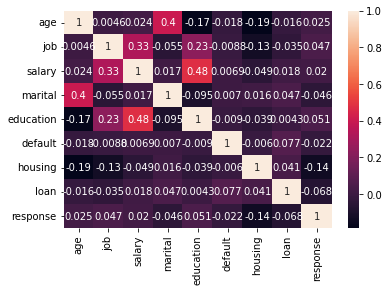

In [24]:
# To identify the co-relation between the dataset
sns.heatmap(df3.corr(), annot=True)
# displaying heatmap
plt.show()

In [25]:
def ploting(x):
  sns.distplot(df3[x], color = 'r').set_title("Distribution Plot")
  plt.show()
  sns.violinplot(x = df3[x], palette = 'Accent', split = True).set_title("Violin Plot")
  plt.show()
  sns.boxplot(x=df3[x], palette = 'cool', width=0.7, linewidth=0.6).set_title("Box Plot")
  plt.show()
  sns.kdeplot(df3[x], cumulative=True).set_title("KDE Plot")
  plt.show()
  plt.figure(figsize=(4,8))
  sns.boxplot(y = x, data = df3, width=0.5,showmeans = True).set_title("Box Plot")
  plt.show()
  print('mean of %s is %s' %(x,df3[x].mean()))
  print('median of %s is %s' %(x,df3[x].median()))
  print('skew of %s is %s' %(x,df3[x].skew()))

/home/munnazeera/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


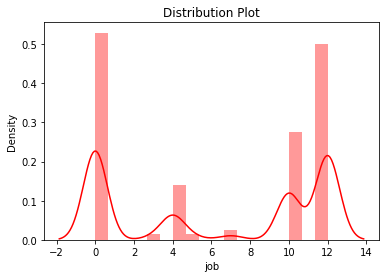

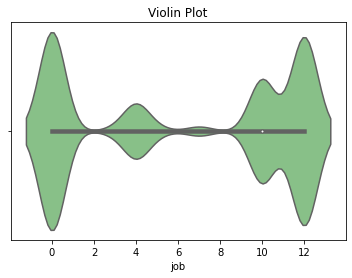

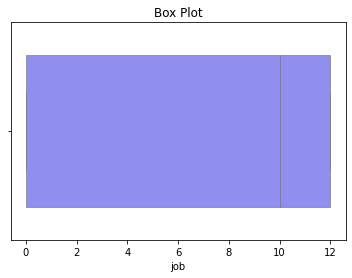

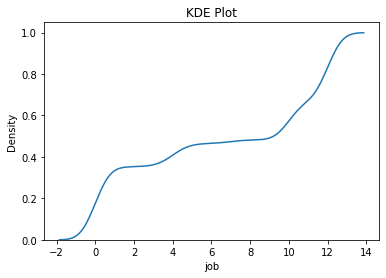

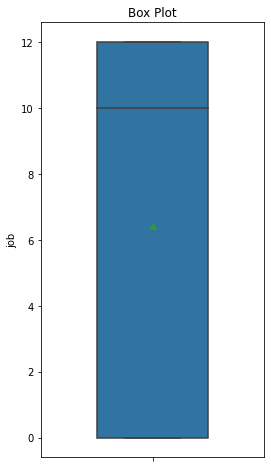

mean of job is 6.413527681316494
median of job is 10.0
skew of job is -0.18974781346745012


In [26]:
ploting('job')

In [27]:
for col in df3.columns:
  Q1 = np.percentile(df3[col], 25,interpolation = 'midpoint')
  Q3 = np.percentile(df3[col], 75,interpolation = 'midpoint')
  IQR = Q3 - Q1
  # Upper bound
  upper = np.where(df3[col] >= (Q3+1.5*IQR))
  # Lower bound
  lower = np.where(df3[col] <= (Q1-1.5*IQR))
  print('for column',col)
  try:
    # Removing the Outliers
    df3.drop(upper[0], inplace = True)
    df3.drop(lower[0], inplace = True)
  except:
    print("No upper or lower outliers")

for column age
for column job
for column salary
for column marital
for column education
No upper or lower outliers
for column default
No upper or lower outliers
for column housing
for column loan
No upper or lower outliers
for column response
No upper or lower outliers


/home/munnazeera/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
X=df3.iloc[:,:-1]
y=df3.iloc[:,-1]
print(X.shape)
print(y.shape)

(44724, 8)
(44724,)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [30]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics

In [31]:
def logReg():
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print('===================Logistic Regression===================')
    cm = metrics.confusion_matrix(y_test,y_pred)
    print('Confusion matrics for Logistic regression is\n',cm)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for Logistic regression is\n',acc)

In [32]:
def navyBais():
    nb = GaussianNB().fit(X_train,y_train)
    y_pred = nb.predict(X_test)
    print('===================Navie Bayes===================')
    cm = metrics.confusion_matrix(y_test,y_pred)
    print('Confusion matrics for Navie Bayes is\n',cm)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for Navie Bayes is\n',acc)

In [33]:
for i in range(1,10):
    #knn = knc(n_neighbors=2,metric = 'euclidean')
    knn = knc(n_neighbors=i,metric = 'manhattan')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for ',i,' is\n',acc)

Accuracy for  1  is
 81.1819943359666
Accuracy for  2  is
 87.54657922194068
Accuracy for  3  is
 85.9517066626919
Accuracy for  4  is
 88.38873155462811
Accuracy for  5  is
 87.81487554031897
Accuracy for  6  is
 88.44090028320167
Accuracy for  7  is
 88.12788791176031
Accuracy for  8  is
 88.56759576688032
Accuracy for  9  is
 88.38873155462811


In [34]:
for i in range(1,10):
    knn = knc(n_neighbors=i,metric = 'euclidean')
    #knn = knc(n_neighbors=i,metric = 'manhattan')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for ',i,' is\n',acc)

Accuracy for  1  is
 81.21925771351916
Accuracy for  2  is
 87.5540318974512
Accuracy for  3  is
 85.92189596064988
Accuracy for  4  is
 88.41108958115964
Accuracy for  5  is
 87.81487554031897
Accuracy for  6  is
 88.4707109852437
Accuracy for  7  is
 88.14279326278134
Accuracy for  8  is
 88.62721717096437
Accuracy for  9  is
 88.36637352809659


In [35]:
def knn():
    knn = knc(n_neighbors=2,metric = 'euclidean')
    #knn = knc(n_neighbors=1,metric = 'manhattan')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print('===================KNN===================')
    cm = metrics.confusion_matrix(y_test,y_pred)
    print('Confusion matrics for KNN is\n',cm)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for KNN is\n',acc)   

In [36]:
for i in range(1,10):
    model = SVC(C=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for',i,'is\n',acc)

Accuracy for 1 is
 88.85079743627962
Accuracy for 2 is
 88.85079743627962
Accuracy for 3 is
 88.85079743627962
Accuracy for 4 is
 88.85079743627962
Accuracy for 5 is
 88.85079743627962
Accuracy for 6 is
 88.85079743627962
Accuracy for 7 is
 88.85079743627962
Accuracy for 8 is
 88.85079743627962
Accuracy for 9 is
 88.85079743627962


In [37]:
def svm():
    model = SVC(C=2)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('===================SVM===================')
    cm = metrics.confusion_matrix(y_test,y_pred)
    print('Confusion matrics for SVM is\n',cm)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for SVM is\n',acc)

In [38]:
for i in range(1,10):
    #dtree = dtc(criterion = 'entropy',max_depth = 3)
    dtree = dtc(criterion = 'gini',max_depth = i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for',i,'is\n',acc)

Accuracy for 1 is
 88.85079743627962
Accuracy for 2 is
 88.85079743627962
Accuracy for 3 is
 88.81353405872709
Accuracy for 4 is
 88.72410195260099
Accuracy for 5 is
 88.74645997913251
Accuracy for 6 is
 88.76881800566403
Accuracy for 7 is
 88.79862870770606
Accuracy for 8 is
 88.71664927709048
Accuracy for 9 is
 88.6495751974959


In [39]:
for i in range(1,10):
    dtree = dtc(criterion = 'entropy',max_depth = i)
    #dtree = dtc(criterion = 'gini',max_depth = i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for',i,'is\n',acc)

Accuracy for 1 is
 88.85079743627962
Accuracy for 2 is
 88.85079743627962
Accuracy for 3 is
 88.81353405872709
Accuracy for 4 is
 88.8358920852586
Accuracy for 5 is
 88.72410195260099
Accuracy for 6 is
 88.739007303622
Accuracy for 7 is
 88.76881800566403
Accuracy for 8 is
 88.62721717096437
Accuracy for 9 is
 88.56014309136981


In [40]:
def dtree():
    #dtree = dtc(criterion = 'entropy',max_depth = 3)
    dtree = dtc(criterion = 'gini',max_depth = 2)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    print('===================Decision Tree===================')
    cm = metrics.confusion_matrix(y_test,y_pred)
    print('Confusion matrics for Decision Tree is\n',cm)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for Decision Tree is\n',acc)

In [41]:
def main():
  logReg()
  navyBais()
  knn()
  svm()
  dtree()

main()

===================Logistic Regression===================
Confusion matrics for Logistic regression is
 [[11922     0]
 [ 1496     0]]
Accuracy for Logistic regression is
 88.85079743627962
===================Navie Bayes===================
Confusion matrics for Navie Bayes is
 [[11922     0]
 [ 1496     0]]
Accuracy for Navie Bayes is
 88.85079743627962
===================KNN===================
Confusion matrics for KNN is
 [[11674   248]
 [ 1422    74]]
Accuracy for KNN is
 87.5540318974512
===================SVM===================
Confusion matrics for SVM is
 [[11922     0]
 [ 1496     0]]
Accuracy for SVM is
 88.85079743627962
===================Decision Tree===================
Confusion matrics for Decision Tree is
 [[11922     0]
 [ 1496     0]]
Accuracy for Decision Tree is
 88.85079743627962


In [42]:
import joblib

In [52]:
dtree = dtc(criterion = 'gini',max_depth = 2)
dtree.fit(X_train,y_train)
joblib.dump(dtree, 'model')

['model']

In [45]:
df3.head()

,age,job,salary,marital,education,default,housing,loan,response
0,58,10,100000,1,3,0,1,0,0
1,44,12,60000,0,2,0,1,0,0
2,33,0,120000,1,2,0,1,1,0
3,47,0,20000,1,0,0,1,0,0
4,33,12,0,0,0,0,0,0,0


In [46]:
m = [[24,2,93000,1,2,0,0,0]]

In [55]:
solve = joblib.load('model')
res = solve.predict(m)
if res == 0:
    print('No')
else:
    print('Yes')


No


In [50]:
print(dtree.predict(m))

[0]


In [54]:
print(solve.predict(m))


[0]
